In [101]:
# Read Fashion MNIST dataset

import util_mnist_reader 
import numpy as np
import scipy
from copy import copy, deepcopy


X_train, y_train = util_mnist_reader.load_mnist('.', kind='train')

X_test, y_test = util_mnist_reader.load_mnist('.', kind='t10k')
#This is to load the dataset provided
X_train = np.transpose(X_train)

X_test = np.transpose(X_test)
#We take the transpose to get it into the shape 10 by 6,0000 so we have have each sample as its own column instead of its own row.
Y = []


for y in y_train:
    x = np.zeros(10)
    x[y] = 1
    Y.append(x)
Y = np.transpose(np.array(Y))

Y_test = []
for y in y_test:
    x = np.zeros(10)
    x[y] = 1
    Y_test.append(x)
Y_test = np.transpose(np.array(Y_test))
#This is to give one-hot encoding to the y_train data in order to get a full Y matrix of size 10 by 60000
    


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [102]:


def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [103]:
np.random.seed(2)
# No. of training examples
m = X_train.shape[1]
# Set the hyperparameters
n_x = 784     #No. of neurons in first layer
n_h = 300  #No. of neurons in hidden layer
n_y = 10   #No. of neurons in output layer
num_of_iters = 1000
learning_rate = 0.001

In [104]:
#Intialize original parameters
W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(n_y, n_h)
b2 = np.zeros((n_y, 1))



In [105]:
def train_model(W1,b1,W2,b2,X_train,Y,learning_rate):
    costs = []
    for i in range(0, num_of_iters+1):
        Z1 = np.dot(W1, X_train) + b1
        A1 = sigmoid(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)
        dZ2 = A2 - Y
        dW2 = np.dot(dZ2, A1.T)/m
        db2 = np.sum(dZ2, axis=1, keepdims=True)/m
        dZ1 = np.multiply(np.dot(W2.T, dZ2), 1-np.power(A1, 2))
        dW1 = np.dot(dZ1, X_train.T)/m
        db1 = np.sum(dZ1, axis=1, keepdims=True)/m
        W1 = W1 - learning_rate*dW1
        b1 = b1 - learning_rate*db1
        W2 = W2 - learning_rate*dW2
        b2 = b2 - learning_rate*db2
        cost = -np.sum(np.multiply(Y, np.log(A2)) +  np.multiply(1-Y, np.log(1-A2)))/m
        cost = np.squeeze(cost)
        if(i%100 == 0):
            costs.append(cost)
            print('Cost after iteration# {:d}: {:f}'.format(i, cost))
    return W1,b1,W2,b2,cost




In [106]:
W1,b1,W2,b2,cost = train_model(W1,b1,W2,b2,X_train,Y,learning_rate)
#OK, Model is now trained! let's use trained model to make accurate predictions

/home/shageenth/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


Cost after iteration# 0: 16.332988
Cost after iteration# 100: 1.728890
Cost after iteration# 200: 1.514033
Cost after iteration# 300: 1.405384
Cost after iteration# 400: 1.351290
Cost after iteration# 500: 1.298481
Cost after iteration# 600: 1.274038
Cost after iteration# 700: 1.265459
Cost after iteration# 800: 1.306685
Cost after iteration# 900: 1.243077
Cost after iteration# 1000: 1.193695


In [107]:
def predict_model(W1,b1,W2,b2,X_test):
    Z1 = np.dot(W1, X_test) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    return np.round(A2)
    

In [111]:
y_predict = predict_model(W1,b1,W2,b2,X_test)
print(y_predict)
len(Y_test[0])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


/home/shageenth/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


10000

In [112]:
accuracy = np.sum(np.multiply(y_predict,Y_test))/len(Y_test[0])*100
print(accuracy)

69.43


Text(0.5,1,'Cost as a Function of Iterations')

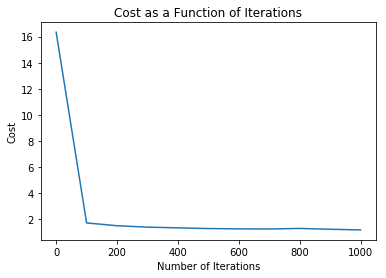

In [115]:
import matplotlib.pyplot as plt

plt.plot(list(range(0,1100,100)),costs)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost as a Function of Iterations')

range(1, 30)
